# EDA - Fuente de datos 2
## Plan Anual de Adquisiones - Secop II
## Vista Minable

**Configuración de algoritmo:**
- Lectura de datos, en formato .pickle.
- Creación de un indice de NIT.
- Eliminar variables y registros no necesarios.
- Depurar por modalidad de contratación.
- Graficos de variables temporales.

**Importar librerías.**

In [1]:
# Load Packages
import os,sys
import pandas as pd
import numpy as np
from datetime import datetime

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

**Importar la base de datos (.pickle).**

In [2]:
import pickle 
import random

In [3]:
# Mostrar la ruta del archivo indiferente del sistema operativo
import os
os.getcwd()

'C:\\Users\\AnalistaNegB2B\\Desktop\\Analista Negocios B2B\\DVJ\\Maestria Ciencias de los Datos y Analitica\\2021-1\\PROYECTO INTEGRADOR\\proy-segmentacion\\jupyter\\DavidRuaJ'

In [4]:
main_path="C:\\Users\\AnalistaNegB2B\\Desktop\\Analista Negocios B2B\\DVJ\\Maestria Ciencias de los Datos y Analitica\\2021-1\\PROYECTO INTEGRADOR\\proy-segmentacion"
data_path="\\data\\02 - Raw"

In [5]:
os.chdir(main_path + data_path)

In [6]:
# Mostrar el directorio de trabajo, documentación de cualquier módulo de Python. 
#os?

In [7]:
os.getcwd()

'C:\\Users\\AnalistaNegB2B\\Desktop\\Analista Negocios B2B\\DVJ\\Maestria Ciencias de los Datos y Analitica\\2021-1\\PROYECTO INTEGRADOR\\proy-segmentacion\\data\\02 - Raw'

In [8]:
df=pickle.load( open(r'df_raw_fuente_2.pickle', "rb" ) )
df.head()

,year,id_paa,entidad,nit,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_menor_cuantia,ppto_min_cuantia,...,ref_operacion,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
0,2018,CO1.APP.361029,COMANDO DE RECLUTAMIENTO Y CONTROL RESERVAS DE...,800130643,CO-DC-11001,Distrito Capital de Bogotá,MISIÓN: El Comando De Reclutamiento y Control ...,Con el fin de cumplir con la misión institucio...,781242000,78124200,...,131-DIREC-2018,2018-01-11 16:36:51.797000000,CCE-16-Servicios_profesionales_gestion,ELKIN ALONSO ARGOTE HIDALGO,V1.80121700,Servicios de responsabilidad civil,V1.80120000,Servicios legales,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
1,2019,CO1.APP.525808,SUPERINTENDENCIA DE TRANSPORTE,800170433,CO-DC-11001,Distrito Capital de Bogotá,"Vigilar, inspeccionar y controlar el cumplimie...",La Superintendencia de Puertos y Transporte vi...,231872480,23187248,...,IPMC 009-2019,2018-12-31 19:59:02.687000000,CCE-10-Minima_Cuantia,MARIA PIERINA GONZALEZ FALLA,V1.53101900,Trajes,V1.53100000,Ropa,V1.53000000,"Ropa, Maletas y Productos de Aseo Personal"
2,2019,CO1.APP.460110,FONAM - DTAN,901037393,CO-SAN-68001,Santander,Misión: Conservamos las áreas protegidas del S...,La entidad estatal va a contratar los procesos...,372652210,37265221,...,DTAN-CD-032-2019,2019-01-18 14:05:15.380000000,CCE-16-Servicios_profesionales_gestion,RUTH MILADY MEJIA OLARTE,V1.80111701,Servicios de contratación de personal,V1.80111700,Reclutamiento de personal,V1.80110000,Servicios de recursos humanos
3,2018,CO1.APP.338501,ESAP TERRITORIAL BOLIVAR,800248529,CO-BOL-13001,Bolívar,Formar ciudadanos y ciudadanas en los conocimi...,La ESAP en el 2019 será una institución de car...,507807300,50780730,...,CD-07-092-2018,2018-08-10 13:46:31.207000000,CCE-16-Servicios_profesionales_gestion,KAROLAIN MORENO,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
4,2018,CO1.APP.324303,GRUPO AÉREO DEL CARIBE,800141634,CO-SAP-88001,"San Andrés, Providencia y Santa Catalina",MISIÓN: Ejecutar operaciones aéreas para contr...,Consolidar una Fuerza Decisiva y efectiva en c...,781242000,78124200,...,010-00-N-GACAR-ESDEB-2018,2018-01-05 12:28:01.607000000,CCE-10-Minima_Cuantia,Diana katherine Quintana Cuervo,V1.10111302,Productos para el aseo y cuidado de mascotas,V1.10111300,Tratamientos para los animales domésticos y ac...,V1.10110000,Productos para animales domésticos


In [9]:
# https://www.colombiacompra.gov.co/tienda-virtual-del-estado-colombiano/ordenes-compra/31845

In [10]:
df.shape

(863969, 29)

In [11]:
df.dtypes

year                        int64
id_paa                     object
entidad                    object
nit                         int64
localizacion               object
localizacion_desc          object
mision_vision              object
pers_estrategica           object
ppto_menor_cuantia          int64
ppto_min_cuantia            int64
ppto_global                 int64
date_first_publication     object
mes_proyectado             object
id_item                    object
categoria_principal        object
precio_base               float64
date_last_publication      object
version                     int64
ref_contrato               object
ref_operacion              object
date_publised              object
modalidad                  object
contacto                   object
cod_producto               object
nombre_producto            object
cod_clase                  object
nombre_clase               object
cod_familia                object
nombre_familia             object
dtype: object

## Organizar los datos para una vista minable.

In [12]:
# Renombrar las columnas 
df  = df.rename(columns={
     'Anno':                        "year", 
     'Identificador PAA':           "id_paa",
     'Entidad':                     "entidad",
     'NIT':                         "nit",
     'Localización':                "localizacion",
     'DescripcionUbicacion':        "localizacion_desc",
     'Mision/Vision':               "mision_vision",
     'Perspectiva Estrategica':     "pers_estrategica",
     'Presupuesto Menor Cuantia':   "ppto_menor_cuantia",
     'Presupuesto Minima Cuantia':  "ppto_min_cuantia",
     'Presupuesto Global':          "ppto_global",
     'Fecha Primera Publicación':   "date_first_publication",
     'Mes Proyectado':              "mes_proyectado",
     'Identificador Item':          "id_item",
     'Categoria Principal':         "categoria_principal",
     'Precio Base':                 "precio_base",
     'Ultima Fecha Modificacion':   "date_last_publication",
     'Version':                     "version",
     'Referencia Contrato':         "ref_contrato",
     'Referencia Operacion':        "ref_operacion",
     'Fecha Publicacion':           "date_publised",
     'Modalidad':                   "modalidad",
     'Contacto':                    "contacto",
     'UNSPSC - Codigo Producto':    "cod_producto", 
     'UNSPSC - Nombre Producto':    "nombre_producto", 
     'UNSPSC - Codigo Clase':       "cod_clase",  
     'UNSPSC - Nombre Clase':       "nombre_clase", 
     'UNSPSC - Codigo Familia':     "cod_familia", 
     'UNSPSC - Nombre Familia':     "nombre_familia"
})

In [13]:
print(list(df.columns))

['year', 'id_paa', 'entidad', 'nit', 'localizacion', 'localizacion_desc', 'mision_vision', 'pers_estrategica', 'ppto_menor_cuantia', 'ppto_min_cuantia', 'ppto_global', 'date_first_publication', 'mes_proyectado', 'id_item', 'categoria_principal', 'precio_base', 'date_last_publication', 'version', 'ref_contrato', 'ref_operacion', 'date_publised', 'modalidad', 'contacto', 'cod_producto', 'nombre_producto', 'cod_clase', 'nombre_clase', 'cod_familia', 'nombre_familia']


In [14]:
# Validar los valores únicos de las variables
df.nunique(axis=0)
print(df.nunique(axis=0))

year                           5
id_paa                      2091
entidad                     1057
nit                          941
localizacion                 316
localizacion_desc             33
mision_vision               1648
pers_estrategica            1524
ppto_menor_cuantia           242
ppto_min_cuantia             211
ppto_global                 2086
date_first_publication      2091
mes_proyectado                13
id_item                   241220
categoria_principal         6192
precio_base                71796
date_last_publication        827
version                      174
ref_contrato              198629
ref_operacion             198667
date_publised               2091
modalidad                     13
contacto                    1643
cod_producto                6192
nombre_producto             6177
cod_clase                   1856
nombre_clase                1852
cod_familia                  414
nombre_familia               413
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863969 entries, 0 to 863968
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    863969 non-null  int64  
 1   id_paa                  863969 non-null  object 
 2   entidad                 863969 non-null  object 
 3   nit                     863969 non-null  int64  
 4   localizacion            863969 non-null  object 
 5   localizacion_desc       863969 non-null  object 
 6   mision_vision           863969 non-null  object 
 7   pers_estrategica        863954 non-null  object 
 8   ppto_menor_cuantia      863969 non-null  int64  
 9   ppto_min_cuantia        863969 non-null  int64  
 10  ppto_global             863969 non-null  int64  
 11  date_first_publication  863969 non-null  object 
 12  mes_proyectado          863969 non-null  object 
 13  id_item                 863969 non-null  object 
 14  categoria_principal 

## Creamos un indice de NIT
Para asignar el nombre de la entidad matriz a cada registro

In [16]:
indice_nit = pd.read_csv('indice_nit.csv', encoding= 'unicode_escape')
indice_nit.head()

,NIT,Entidad
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ
1,88143760,SAID ALONSO PENALOZA ANTELIZ
2,123456780,NO UTILIZAR
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E


Aseguramos que la variable "NIT" conserve el mismo formato en ambos lados y modificamos el nombre de entidad por "entidad_matriz"

In [17]:
#Renombrar variables
indice_nit = indice_nit.rename(columns={'NIT': "nit", 'Entidad': "entidad_matriz"})
indice_nit

,nit,entidad_matriz
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ
1,88143760,SAID ALONSO PENALOZA ANTELIZ
2,123456780,NO UTILIZAR
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E
...,...,...
936,9008012094,POLICIAMETROPOLITANA DE TUNJA
937,9008529985,AGENCIA NACIONAL DE SEGURIDAD VIAL
938,9009585649,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E
939,9011548528,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...


Agregamos un merge entre la matriz de entidades y el dataframe.

In [18]:
from pandas import DataFrame, merge

In [19]:
df = indice_nit.merge(df, on='nit', how='left')
df

,nit,entidad_matriz,year,id_paa,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_menor_cuantia,...,ref_operacion,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ,2019,CO1.APP.361052,BARBARA IVONNE LINARES RODRIGUEZ,CO-MET,Meta,El municipio de La Macarena será en el 2027 un...,Un Gobierno que responda oportuna y eficientem...,231872480,...,LP-2019-003,2019-01-17 23:25:09.063000000,CCE-17-Licitacion_Publica_Obra_Publica,cesar humberto peña quintero,V1.72141100,Servicios de pavimentación y superficies de ed...,V1.72140000,Servicios de construcción pesada,V1.72000000,"Servicios de Edificación, Construcción de Inst..."
1,88143760,SAID ALONSO PENALOZA ANTELIZ,2018,CO1.APP.193629,SAID ALONSO PEÑALOZA ANTELIZ,CO-NSA-54498,Norte de Santander,Promover el desarrollo humano y sostenible del...,"En el año 2025, El Municipio de Ocaña será una...",218747844,...,SG 001 DEL 2018,2018-01-12 23:51:18.550000000,NaN,RUBEN DARIO BAYONA RIBON,V1.78102203,"Servicios de envío, recogida o entrega de correo",V1.78102200,Servicios postales de paqueteo y courrier,V1.78100000,Transporte de correo y carga
2,123456780,NO UTILIZAR,2016,CO1.APP.11902,NO UTILIZAR,CO-DC-11001,Distrito Capital de Bogotá,"Misión\nLograr una EDUCACIÓN DE CALIDAD, que f...",Objetivos Misionales\n\nBrindar educación ini...,689454000,...,SA-MEN-02-2016,2016-02-17 22:42:09.700000000,CCE-05-Contratacion_Directa,RUBEN DARIO CASTAÑO,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA,2017,CO1.APP.155102,CONTRALORIA MUNICIPAL DE FLORIDABLANCA,CO-SAN-68276,Santander,MISIÓN: Fortalecer el control y la vigilancia ...,1.Fortalecer la vigilancia y el control fiscal...,206560760,...,D-001-2017,2017-01-23 22:04:32.327000000,CCE-05-Contratacion_Directa,GLORIA RAQUEL GOMEZ URIBE,V1.80131502,Arrendamiento de instalaciones comerciales o i...,V1.80131500,Alquiler y arrendamiento de propiedades o edif...,V1.80130000,Servicios inmobiliarios
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E,2019,CO1.APP.372454,HOSPITAL MARIO GAITÁN YANGUAS E.S.E,CO-CUN-25754,Cundinamarca,Misión\n\nSomos una institución pública presta...,La ESE Ese Hospital Mario Gaitán del municipio...,165623200,...,INVITACIÓN A COTIZAR No. 011 DE 2019,2019-01-31 22:00:28.763000000,CCE-11-Procedimiento_Publicidad,PEDRO ENRIQUE CHAVES CHAVES,V1.76121600,Disposición de desechos no peligrosos,V1.76120000,Eliminación y tratamiento de desechos,V1.76000000,"Servicios de Limpieza, Descontaminación y Trat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863964,9011548528,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...,2018,CO1.APP.246214,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...,CO-BOY,Boyacá,"Promover, desarrollar y explotar soluciones de...",Asegurar que el sistema de compras y contratac...,218747760,...,SSO-01-2018,2018-05-11 22:28:41.887000000,CCE-15-Procedimiento_Publicidad_with_Proposals...,FABIO DARIO GUERRA ESPINOSA,V1.80101501,Servicios de asesoramiento sobre la puesta en ...,V1.80101500,Servicios de consultoría de negocios y adminis...,V1.80100000,Servicios de asesoría de gestión
863965,9011548528,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...,2018,CO1.APP.246214,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...,CO-BOY,Boyacá,"Promover, desarrollar y explotar soluciones de...",Asegurar que el sistema de compras y contratac...,218747760,...,SSO-002-2018,2018-05-11 22:28:41.887000000,CCE-15-Procedimiento_Publicidad_with_Proposals...,FABIO DARIO GUERRA ESPINOSA,V1.80101501,Servicios de asesoramiento sobre la puesta en ...,V1.80101500,Servicios de consultoría de negocios y adminis...,V1.80100000,Servicios de asesoría de gestión
863966,9011548528,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...,2018,CO1.APP.246214,SOCIE

## Eliminar variables y registros no necesarios

In [20]:
#Eliminar variables
df=df.drop(['id_paa', 'ppto_menor_cuantia', 'ppto_min_cuantia', 'date_first_publication', 'id_item', 'categoria_principal', 'version','ref_operacion'], axis=1)
df.head(10)

,nit,entidad_matriz,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,ref_contrato,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ,2019,BARBARA IVONNE LINARES RODRIGUEZ,CO-MET,Meta,El municipio de La Macarena será en el 2027 un...,Un Gobierno que responda oportuna y eficientem...,21682389549,Febrero,...,LP-2019-003,2019-01-17 23:25:09.063000000,CCE-17-Licitacion_Publica_Obra_Publica,cesar humberto peña quintero,V1.72141100,Servicios de pavimentación y superficies de ed...,V1.72140000,Servicios de construcción pesada,V1.72000000,"Servicios de Edificación, Construcción de Inst..."
1,88143760,SAID ALONSO PENALOZA ANTELIZ,2018,SAID ALONSO PEÑALOZA ANTELIZ,CO-NSA-54498,Norte de Santander,Promover el desarrollo humano y sostenible del...,"En el año 2025, El Municipio de Ocaña será una...",27091684868,No Definido,...,SG 001 DEL 2018,2018-01-12 23:51:18.550000000,NaN,RUBEN DARIO BAYONA RIBON,V1.78102203,"Servicios de envío, recogida o entrega de correo",V1.78102200,Servicios postales de paqueteo y courrier,V1.78100000,Transporte de correo y carga
2,123456780,NO UTILIZAR,2016,NO UTILIZAR,CO-DC-11001,Distrito Capital de Bogotá,"Misión\nLograr una EDUCACIÓN DE CALIDAD, que f...",Objetivos Misionales\n\nBrindar educación ini...,774451528682,Enero,...,SA-MEN-02-2016,2016-02-17 22:42:09.700000000,CCE-05-Contratacion_Directa,RUBEN DARIO CASTAÑO,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA,2017,CONTRALORIA MUNICIPAL DE FLORIDABLANCA,CO-SAN-68276,Santander,MISIÓN: Fortalecer el control y la vigilancia ...,1.Fortalecer la vigilancia y el control fiscal...,238230000,Febrero,...,D-001-2017,2017-01-23 22:04:32.327000000,CCE-05-Contratacion_Directa,GLORIA RAQUEL GOMEZ URIBE,V1.80131502,Arrendamiento de instalaciones comerciales o i...,V1.80131500,Alquiler y arrendamiento de propiedades o edif...,V1.80130000,Servicios inmobiliarios
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E,2019,HOSPITAL MARIO GAITÁN YANGUAS E.S.E,CO-CUN-25754,Cundinamarca,Misión\n\nSomos una institución pública presta...,La ESE Ese Hospital Mario Gaitán del municipio...,25358552162,Febrero,...,INVITACIÓN A COTIZAR No. 011 DE 2019,2019-01-31 22:00:28.763000000,CCE-11-Procedimiento_Publicidad,PEDRO ENRIQUE CHAVES CHAVES,V1.76121600,Disposición de desechos no peligrosos,V1.76120000,Eliminación y tratamiento de desechos,V1.76000000,"Servicios de Limpieza, Descontaminación y Trat..."
5,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E,2018,HOSPITAL MARIO GAITÁN YANGUAS E.S.E,CO-CUN-25754,Cundinamarca,El principal objetivo del Plan Anual de Adquis...,La ESE Ese Hospital Mario Gaitán del municipio...,23587140092,Enero,...,INVITACIÓN DIRECTA No. 009 DE 2018,2018-01-30 20:59:05.630000000,CCE-11-Procedimiento_Publicidad,PEDRO ENRIQUE CHAVES,V1.85101605,Auxiliares de salud a domicilio,V1.85101600,Personas de soporte de prestación de servicios...,V1.85100000,Servicios integrales de salud
6,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E,2018,HOSPITAL MARIO GAITÁN YANGUAS E.S.E,CO-CUN-25754,Cundinamarca,El principal objetivo del Plan Anual de Adquis...,La ESE Ese Hospital Mario Gaitán del municipio...,23587140092,Enero,...,INVITACION DIRECTA 020-2018,2018-01-30 20:59:05.630000000,CCE-11-Procedimiento_Publicidad,PEDRO ENRIQUE CHAVES,V1.51181800,"Estrógenos, progesteronas y anticonceptivos in...",V1.51180000,Hormonas y antagonistas hormonales,V1.51000000,Medicamentos y Productos Farmacéuticos
7,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E,2018,HOSPITAL MARIO GAITÁN YANGUAS E.S.E,CO-CUN-25754,Cundinamarca,El principal objetivo del Plan Anual de Adquis...,La ESE Ese Hospital Mario Gaitán del municipio...,23587140092,Enero,...,INVITACIÓN A COTIZAR No. 023 DE 2018,2018-01-30 20:59:05.630000000

## Depurar por modalidades

In [21]:
print('\033[1m' + "modalidad" + '\033[0m')
print(df.modalidad.unique())

modalidad
['CCE-17-Licitacion_Publica_Obra_Publica' nan
 'CCE-05-Contratacion_Directa' 'CCE-11-Procedimiento_Publicidad'
 'CCE-16-Servicios_profesionales_gestion'
 'CCE-06-Seleccion_Abreviada_Menor_Cuantia'
 'CCE-15-Procedimiento_Publicidad_with_ProposalsPhase'
 'CCE-07-Seleccion_Abreviada_Subasta' 'CCE-10-Minima_Cuantia'
 'CCE-02-Licitacion_Publica' 'CCE-04-Concurso_Meritos_Sin_Lista_Corta'
 'CCE-18-Seleccion_Abreviada_Menor_Cuantia_Sin_Manifestacion_Interes'
 'CCE-01-Estudio_Mercado' 'CCE-03-Concurso_Meritos_Con_Lista_Corta']


In [22]:
# Eliminar filas de 'modalidad' que no le interesan a Caoba.
df=df[df["modalidad"].str.contains("03|04|05|07|10|11|15|17|18")==False]
df.head()

,nit,entidad_matriz,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,ref_contrato,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,CD - 003,2019-01-09 18:06:28.570000000,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,CRE-MT-SDS-016-2019,2018-12-29 01:24:49.073000000,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,004-2019,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,015-2019,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,017-2019,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."


In [23]:
print(df.modalidad.unique())

['CCE-16-Servicios_profesionales_gestion'
 'CCE-06-Seleccion_Abreviada_Menor_Cuantia' 'CCE-02-Licitacion_Publica'
 'CCE-01-Estudio_Mercado']


In [24]:
df.shape

(349682, 22)

In [25]:
# Reemplazar el 'mes_proyectado'==No Definido por 'Enero'
df['mes_proyectado'].replace('No Definido','Enero', inplace=True)
df['mes_proyectado'].value_counts()

Enero         141263
Febrero        58028
Marzo          31168
Octubre        19178
Agosto         14404
Abril          13415
Julio          13192
Septiembre     12915
Diciembre      12889
Junio          11474
Noviembre      10914
Mayo           10842
Name: mes_proyectado, dtype: int64

Convertimos las 2 variables de fecha, de tipo texto a tipo fecha:

In [26]:
df[['date_last_publication','date_publised']].dtypes

date_last_publication    object
date_publised            object
dtype: object

In [27]:
df[['date_last_publication','date_publised']]=df[['date_last_publication','date_publised']].astype('datetime64[ns]')
df['date_last_publication'].head()

22   2019-01-09 18:06:00
41   2019-12-27 00:00:00
75   2019-02-13 00:00:00
76   2019-02-13 00:00:00
77   2019-02-13 00:00:00
Name: date_last_publication, dtype: datetime64[ns]

In [28]:
df['date_publised'].head()

22   2019-01-09 18:06:28.570
41   2018-12-29 01:24:49.073
75   2019-01-11 15:10:41.077
76   2019-01-11 15:10:41.077
77   2019-01-11 15:10:41.077
Name: date_publised, dtype: datetime64[ns]

In [29]:
# Ajustar el formato de 'date_publised' a año-mes-dia
df['date_publised']=df['date_publised'].dt.strftime('%d/%m/%Y')
df['date_publised']=pd.to_datetime(df['date_publised'],format='%d/%m/%Y')
df['date_publised'].head()

22   2019-01-09
41   2018-12-29
75   2019-01-11
76   2019-01-11
77   2019-01-11
Name: date_publised, dtype: datetime64[ns]

**Consideremos los días entre los 2 campos 'date_last_publication' y 'date_publised':**

In [30]:
df['diff_dates']=(df['date_last_publication']-df['date_publised']).dt.days
df['diff_dates'].head(10)

22      0
41    363
75     33
76     33
77     33
78     33
79     33
80     33
81     33
82     33
Name: diff_dates, dtype: int64

In [31]:
print(sorted(df.diff_dates.unique()))

[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 69, 70, 71, 74, 77, 79, 80, 83, 84, 87, 90, 91, 92, 95, 97, 98, 99, 103, 104, 105, 106, 107, 108, 109, 110, 111, 116, 118, 119, 120, 123, 126, 127, 128, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 158, 160, 161, 163, 166, 167, 168, 170, 172, 173, 175, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 193, 195, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 218, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 245, 247, 248, 250, 251, 252, 253, 255, 256, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,

In [32]:
# Descripción de la nueva variable 'diff_dates'
df['diff_dates'].describe()

count    349682.000000
mean        347.711263
std          60.847493
min           0.000000
25%         347.000000
50%         366.000000
75%         366.000000
max        1204.000000
Name: diff_dates, dtype: float64

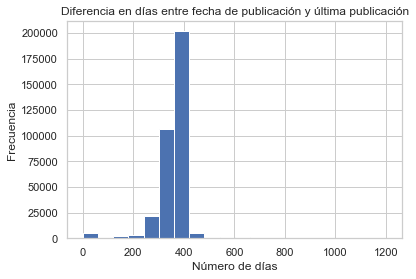

In [33]:
df['diff_dates'].plot(kind='hist', bins=20)
plt.title('Diferencia en días entre fecha de publicación y última publicación')
plt.ylabel('Frecuencia')
plt.xlabel('Número de días')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


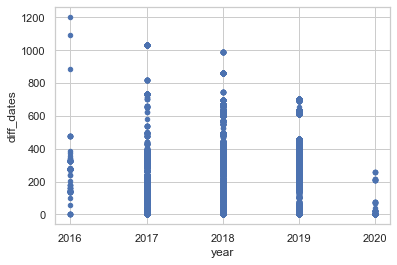

In [34]:
df[['year','diff_dates']].plot(kind='scatter',x='year',y='diff_dates')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()

**Comparación entre año de presupuesto (PAA) y año de publicación**

In [35]:
df['year_publised'] = pd.DatetimeIndex(df['date_publised']).year
df['year_publised'].head()

22    2019
41    2018
75    2019
76    2019
77    2019
Name: year_publised, dtype: int64

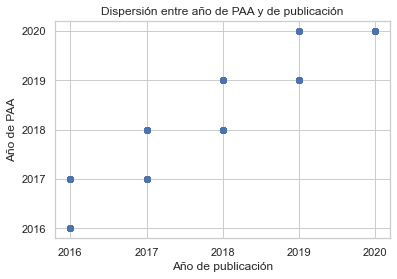

In [36]:
plt.scatter(df['year_publised'],df['year'])
plt.title('Dispersión entre año de PAA y de publicación')
plt.ylabel('Año de PAA')
plt.xlabel('Año de publicación')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.yticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()

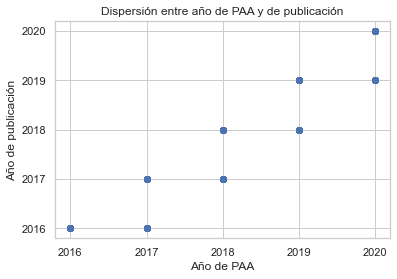

In [37]:
plt.scatter(df['year'],df['year_publised'])
plt.title('Dispersión entre año de PAA y de publicación')
plt.xlabel('Año de PAA')
plt.ylabel('Año de publicación')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.yticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()


**Agrupemos algunas variables por fechas:**

In [38]:
df.groupby(["year", 'year_publised'])["modalidad"].count()

year  year_publised
2016  2016                138
2017  2016                 31
      2017               4209
2018  2017               9252
      2018             278399
2019  2018               7275
      2019              49971
2020  2019                  6
      2020                401
Name: modalidad, dtype: int64

In [39]:
# Groupby "modalidad"; "localizacion"; "nombre_producto"

## Eliminar registros con valores NaN en el DataFrame

In [40]:
df.head(10)

,nit,entidad_matriz,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,diff_dates,year_publised
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,0,2019
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,363,2018
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
78,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
79,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
80,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
81,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCI

In [41]:
df.dropna(inplace=True)
df

,nit,entidad_matriz,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,diff_dates,year_publised
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,0,2019
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,363,2018
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863960,9009585649,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,2018,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,CO-DC-11001,Distrito Capital de Bogotá,La Subred Integrada de servicios de Salud Sur ...,La Subred Integrada de Servicios de Salud Sur...,171197197512,Enero,...,CCE-16-Servicios_profesionales_gestion,ADRIANA VASQUEZ,V1.80111701,Servicios de contratación de personal,V1.80111700,Reclutamiento de personal,V1.80110000,Servicios de recursos humanos,334,2018
863961,9009585649,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,2018,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,CO-DC-11001,Distrito Capital de Bogotá,La Subred Integrada de servicios de Salud Sur ...,La Subred Integrada de Servicios de Salud Sur...,171197197512,Enero,...,CCE-16-Servicios_profesionales_gestion,ADRIANA VASQUEZ,V1.80111701,Servicios de contratación de personal,V1.80111700,Reclutamiento de personal,V1.80110000,Servicios de recursos humanos,334,2018
863962,9009585649,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,2018,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,CO-DC-11001,Distrito Capital de Bogotá,La Subred Integrada de servicios de Salud Sur ...,La Subred Integrada de Servicios de Salud Sur...,171197197512,Enero,...,CCE-16-Servicios_profesionales_gestion,ADRIANA VASQUEZ,V1.80111701,Servicios de contratación de personal,V1.80111700,Reclutamiento de personal,V1.80110000,Servicios de recursos humanos,334,2018
863963,9009585649,SUBRED INTEGRADA DE SERVICIOS DE SALUD SU

In [42]:
df.to_pickle("Fuente_2_vista_minable.pickle")

# Fin de documento